# 패키지 및 라이브러리

In [ ]:
! pip install hrv==0.2.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 832.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp38-cp38-linux_x86_64.whl size=237785 sha256=061eec85529831e970515e3409d5caa9d6ce70ab333f24efb79befad75f65007
  Stored in directory: /root/.cache/pip/wheels/8f/2c/22/4a514eb971c5f4693506f55ff7ff43fd501495322cb0b92464
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64216 sha256=737bd37f17b2e1e6e757411ed759f348eb7d69911d440db8e9690892dd5dd568
  Stored in directory: /root/.cache/pip/wheels/ed/f7/20/2b6bbee53a7f66bb264ad2bd1416f37285afab73dcec851feb
Successfully built spectrum easydev


In [ ]:
! pip install hrv-analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from hrvanalysis import plot_psd
from hrvanalysis import plot_distrib
from hrvanalysis import plot_poincare

from hrv.io import read_from_text
from hrv.filters import quotient, moving_median
from hrv.classical import frequency_domain, time_domain
from hrv.detrend import polynomial_detrend
from hrv.nonstationary import time_varying

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rri_df = pd.read_table("/content/drive/MyDrive/데이터/HRV프리뷰/2023-02-21 01-16-48.txt")

In [ ]:
rri_df.describe()

,917
count,1054.000000
mean,769.186907
std,186.694433
min,350.000000
25%,589.000000
50%,771.000000
75%,896.750000
max,1201.000000


In [ ]:
rri_list = list(rri_df.iloc[:,0].T)

# hrv-analysis패키지 시각화

## R-R Interval

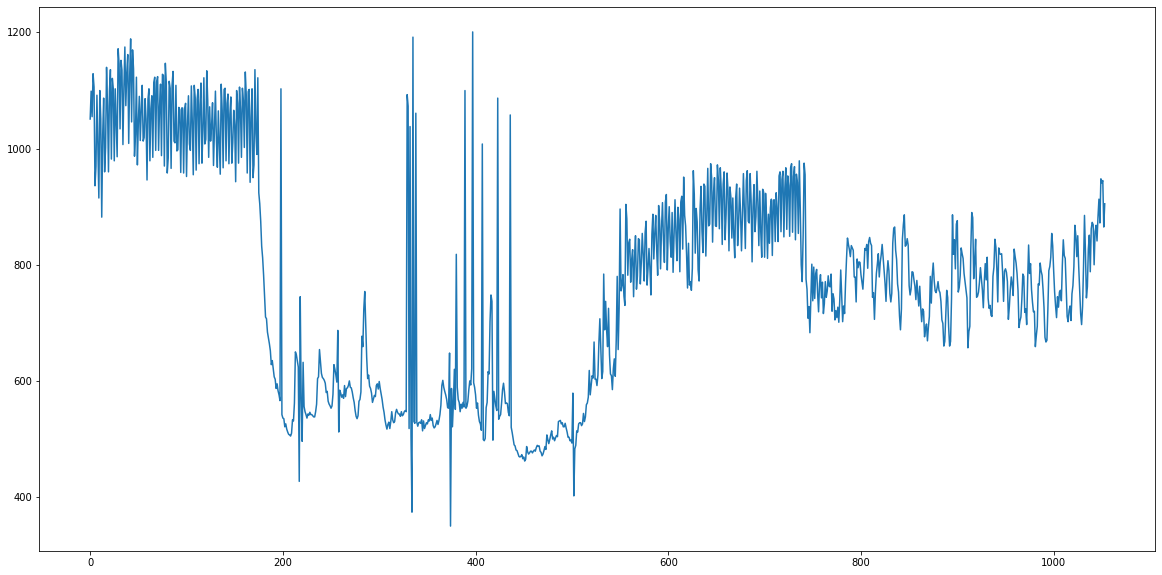

In [ ]:
plt.figure(figsize=[20,10])
plt.plot(rri_df)
plt.show()

In [ ]:
import plotly.express as px

plt.figure(figsize=[20,10])

fig = px.line(rri_df)
fig.show()

<Figure size 1440x720 with 0 Axes>

## 주파수 영역별 변이도(FFT Spectrum)

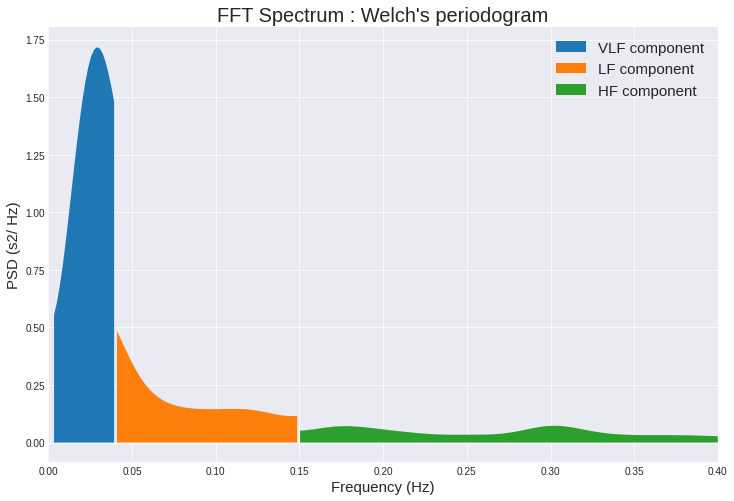

In [ ]:
plot_psd(rri_list, method="welch")

## n, n+1 좌표 분포도

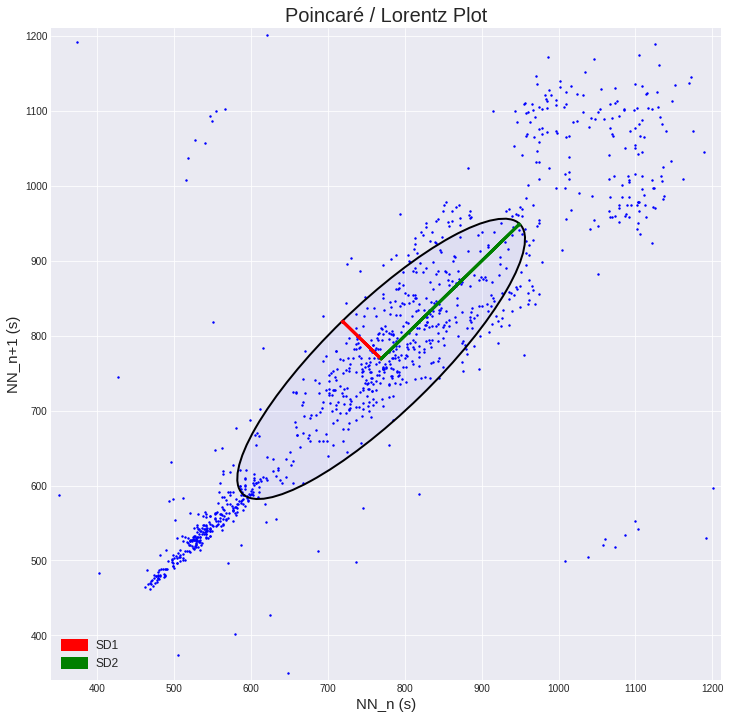

In [ ]:
plot_poincare(rri_list, plot_sd_features=True)

# hrv 패키지

## 전처리

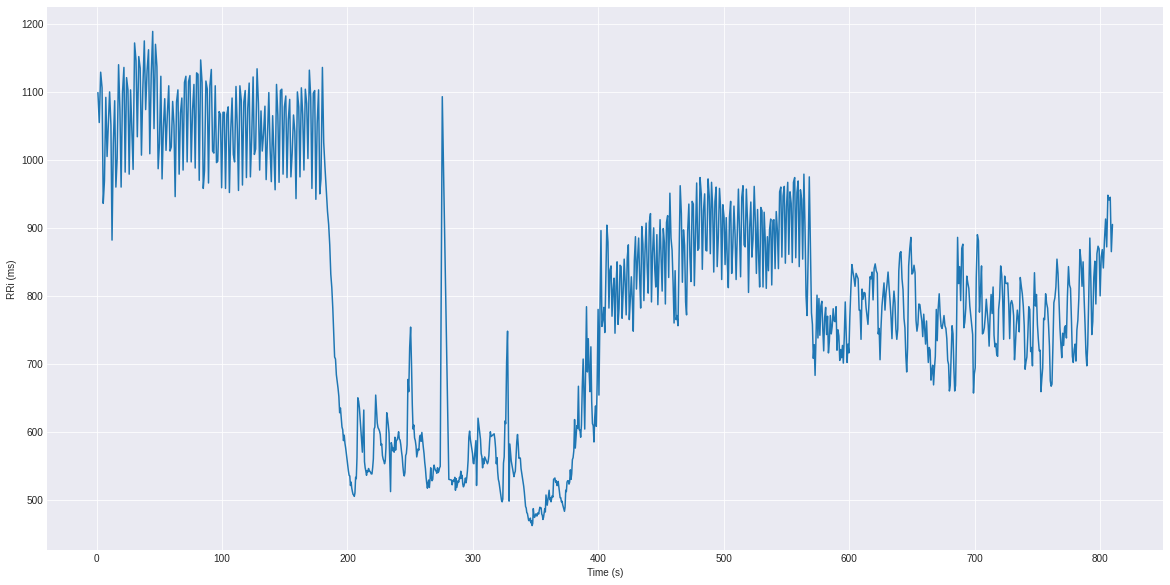

In [ ]:
# 이상치 제거

fig, ax = plt.subplots(figsize=(20, 10))

fq_rri = quotient(rri_df)
fq_rri.plot(ax=ax)

plt.show()

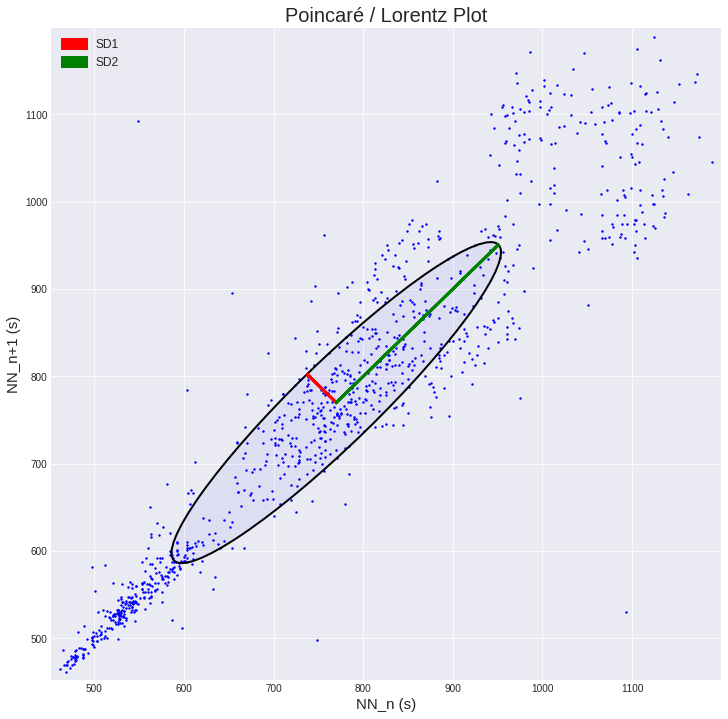

In [ ]:
plot_poincare(fq_rri, plot_sd_features=True)

### task1

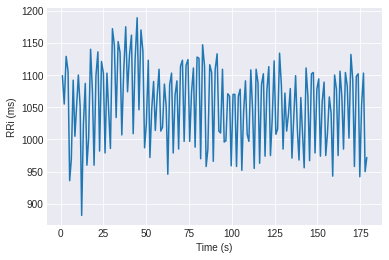

In [ ]:
# 분석구간 지정 -> 클래스를 나눔
task1_rri = fq_rri.time_range(start=0, end=180)
fig, ax = task1_rri.plot()

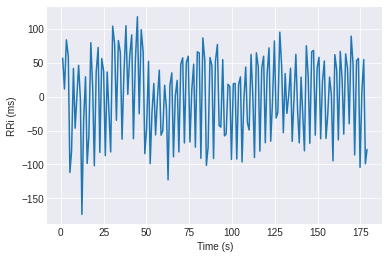

In [ ]:
# 주파수 영역 기능을 추출하기 전에 먼저 RRI 신호에서 느린 추세를 제거합니다:
detrended_task1_rri = polynomial_detrend(task1_rri, degree=3)
fig, ax = detrended_task1_rri.plot()

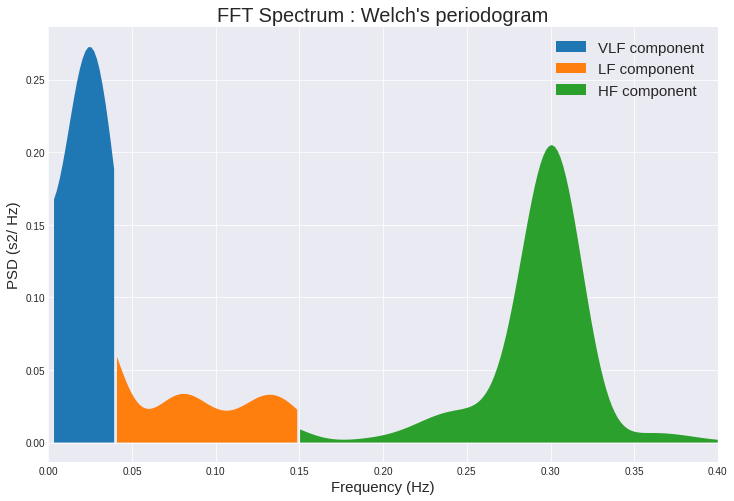

In [ ]:
plot_psd(task1_rri, method="welch")

### task2

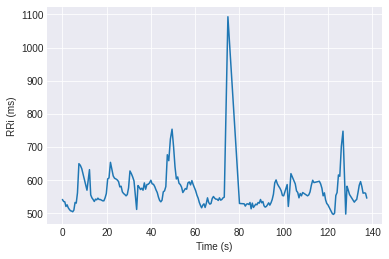

In [ ]:
task2_rri = fq_rri.time_range(start=200, end=340).reset_time()
fig, ax = task2_rri.plot()

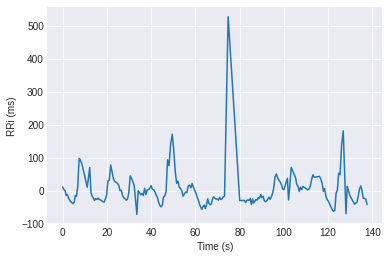

In [ ]:
detrended_task2_rri = polynomial_detrend(task2_rri, degree=3)
fig, ax = detrended_task2_rri.plot()

### task3

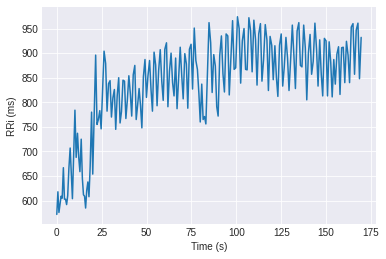

In [ ]:
task3_rri = fq_rri.time_range(start=380, end=550).reset_time()
fig, ax = task3_rri.plot()

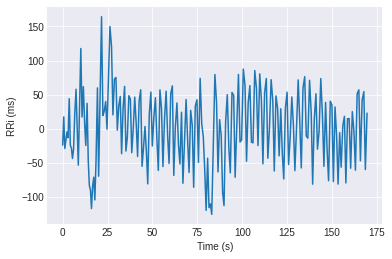

In [ ]:
detrended_task3_rri = polynomial_detrend(task3_rri, degree=3)
fig, ax = detrended_task3_rri.plot()

### task4

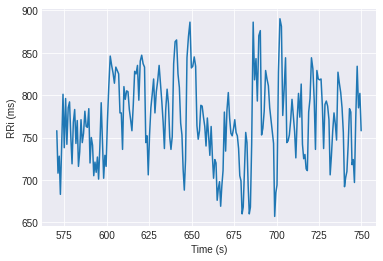

In [ ]:
task4_rri = fq_rri.time_range(start=570, end=750)
fig, ax = task4_rri.plot()

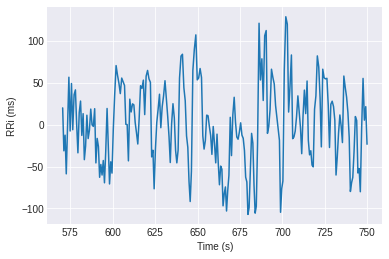

In [ ]:
detrended_task4_rri = polynomial_detrend(task4_rri, degree=3)
fig, ax = detrended_task4_rri.plot()

## 시각화

### task1 Information

- time_domain은 이상치를 제거한 데이터로 분석함
- frequency_domain은 이상치를 제거하고 추세성을 없앤 데이터로 분석함

In [ ]:
# task 중 데이터 정보
task1_rri.info()

N Points: 169
Duration: 177.78s
Interpolated: False
Detrended: False
Memory Usage: 1.32Kb

In [ ]:
task1_rri.describe()

----------------------------------------
                   rri          hr
----------------------------------------
min             882.00       50.46
max            1189.00       68.03
mean           1053.01       57.19
var            4039.64       12.35
std              63.56        3.51
median         1067.00       56.23
amplitude       307.00       17.56

In [ ]:
# task 중 HRV 정보
task1_rri_time_domain = time_domain(task1_rri)
task1_rri_time_domain

{'rmssd': 96.26763907634452,
 'sdnn': 63.747080994393144,
 'sdsd': 96.55245833155146,
 'nn50': 115,
 'pnn50': 68.04733727810651,
 'mrri': 1053.0118343195265,
 'mhr': 57.191108452477145}

In [ ]:
# task 중 데이터에서 추세 제거한 정보
detrended_task1_rri.info()

N Points: 169
Duration: 177.78s
Interpolated: False
Detrended: True
Memory Usage: 1.32Kb

In [ ]:
# task 중 데이터에서 추세 제거한 정보
task1_rri_freq_domain = frequency_domain(
    detrended_task1_rri,
    method="welch",
    nperseg=64,
    noverlap=32,
    interp_method="cubic",
    window="hanning",
    fs=4.0
)

task1_rri_freq_domain

{'total_power': 2924.6489637988293,
 'vlf': 0.0,
 'lf': 190.70864056647548,
 'hf': 2733.940323232354,
 'lf_hf': 0.0697559631956412,
 'lfnu': 6.520736092674994,
 'hfnu': 93.479263907325}

### task2 Information

In [ ]:
task2_rri.info()

N Points: 209
Duration: 137.55s
Interpolated: False
Detrended: False
Memory Usage: 1.63Kb

In [ ]:
task2_rri.describe()

----------------------------------------
                   rri          hr
----------------------------------------
min             497.00       54.89
max            1093.00      120.72
mean            567.16      106.56
var            3104.88       66.09
std              55.72        8.13
median          557.00      107.72
amplitude       596.00       65.83

In [ ]:
task2_rri_time_domain = time_domain(task2_rri)
task2_rri_time_domain

{'rmssd': 61.82263712863163,
 'sdnn': 55.8552296581255,
 'sdsd': 61.97178425581976,
 'nn50': 20,
 'pnn50': 9.569377990430622,
 'mrri': 567.1578947368421,
 'mhr': 106.55900709738363}

In [ ]:
detrended_task2_rri.info()

N Points: 209
Duration: 137.55s
Interpolated: False
Detrended: True
Memory Usage: 1.63Kb

In [ ]:
task2_rri_freq_domain = frequency_domain(
    detrended_task2_rri,
    method="welch",
    nperseg=64,
    noverlap=32,
    interp_method="cubic",
    window="hanning",
    fs=4.0
)

task2_rri_freq_domain

{'total_power': 4211.093401272619,
 'vlf': 0.0,
 'lf': 3538.1066415497176,
 'hf': 672.9867597229013,
 'lf_hf': 5.257319836435585,
 'lfnu': 84.0187168605778,
 'hfnu': 15.981283139422183}

### task3 Information

In [ ]:
task3_rri.info()

N Points: 201
Duration: 169.53s
Interpolated: False
Detrended: False
Memory Usage: 1.57Kb

In [ ]:
task3_rri.describe()

----------------------------------------
                   rri          hr
----------------------------------------
min             572.00       61.60
max             974.00      104.90
mean            832.01       73.32
var            9893.15      104.78
std              99.46       10.24
median          850.00       70.59
amplitude       402.00       43.29

In [ ]:
task3_rri_time_domain = time_domain(task3_rri)
task3_rri_time_domain

{'rmssd': 73.77953645828903,
 'sdnn': 99.71268675799239,
 'sdsd': 73.94266419287106,
 'nn50': 111,
 'pnn50': 55.223880597014926,
 'mrri': 832.0099502487562,
 'mhr': 73.32486592534381}

In [ ]:
detrended_task3_rri.info()

N Points: 201
Duration: 169.53s
Interpolated: False
Detrended: True
Memory Usage: 1.57Kb

In [ ]:
task3_rri_freq_domain = frequency_domain(
    detrended_task3_rri,
    method="welch",
    nperseg=64,
    noverlap=32,
    interp_method="cubic",
    window="hanning",
    fs=4.0
)

task3_rri_freq_domain

{'total_power': 1539.1184905449911,
 'vlf': 0.0,
 'lf': 357.5271669080046,
 'hf': 1181.5913236369865,
 'lf_hf': 0.30258106991469885,
 'lfnu': 23.229346480101523,
 'hfnu': 76.77065351989847}

### task4 Information

In [ ]:
task4_rri.info()

N Points: 234
Duration: 179.31s
Interpolated: False
Detrended: False
Memory Usage: 1.83Kb

In [ ]:
task4_rri.describe()

----------------------------------------
                   rri          hr
----------------------------------------
min             657.00       67.42
max             890.00       91.32
mean            769.53       78.29
var            2396.76       25.05
std              48.96        5.00
median          770.00       77.92
amplitude       233.00       23.91

In [ ]:
task4_rri_time_domain = time_domain(task4_rri)
task4_rri_time_domain

{'rmssd': 39.82030452370392,
 'sdnn': 49.06168013331171,
 'sdsd': 39.90603186625231,
 'nn50': 38,
 'pnn50': 16.23931623931624,
 'mrri': 769.5299145299145,
 'mhr': 78.28706750875723}

In [ ]:
detrended_task4_rri.info()

N Points: 234
Duration: 179.31s
Interpolated: False
Detrended: True
Memory Usage: 1.83Kb

In [ ]:
task4_rri_freq_domain = frequency_domain(
    detrended_task4_rri,
    method="welch",
    nperseg=64,
    noverlap=32,
    interp_method="cubic",
    window="hanning",
    fs=4.0
)

task4_rri_freq_domain

{'total_power': 7.005409058105482e+18,
 'vlf': 0.0,
 'lf': 7.005391619940066e+18,
 'hf': 17438165416142.463,
 'lf_hf': 401727.55864875525,
 'lfnu': 99.99975107570063,
 'hfnu': 0.0002489242993735812}

### Task 중과 후 비교

In [ ]:
def compare_indices(ax, cond_1, cond_2, cond_3, cond_4, index_name, title, y_label):
    ax.bar([0, 3], [cond_1[index_name], cond_2[index_name], cond_3[index_name], cond_4[index_name]], color=["b", "r", 'g', 'o'])
    ax.set_xticks([0, 3])
    ax.set_xticklabels(["task1", "task2", "task3", "task4"])
    ax.set(ylabel=y_label)
    ax.set(title=title)

ValueError: ignored

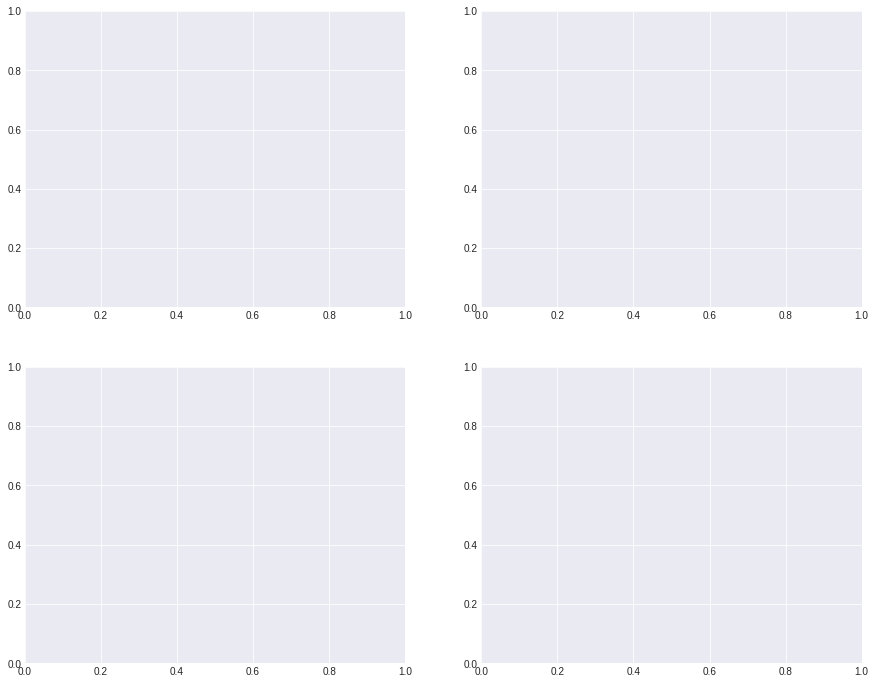

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 12)

compare_indices(
    ax[0][0],
    task1_rri_time_domain,
    task2_rri_time_domain,
    task3_rri_time_domain,
    task4_rri_time_domain,
    "rmssd",
    title="Time Domain",
    y_label="RMSSD (ms)"
)
compare_indices(
    ax[0][1],
    task1_rri_time_domain,
    task2_rri_time_domain,
    task3_rri_time_domain,
    task4_rri_time_domain,
    "pnn50",
    title="Time Domain",
    y_label="pNN50 (%)"
)

compare_indices(
    ax[1][0],
    task1_rri_freq_domain,
    task2_rri_freq_domain,
    task3_rri_freq_domain,
    task4_rri_freq_domain,
    "hf",
    title="Frequency Domain",
    y_label="HF (ms²)"
)
compare_indices(
    ax[1][1],
    task1_rri_freq_domain,
    task2_rri_freq_domain,
    task3_rri_freq_domain,
    task4_rri_freq_domain,
    "lf",
    title="Frequency Domain",
    y_label="LF (ms²)"
)

In [ ]:
def compare_indices(ax, cond_1, cond_2, index_name, title, y_label):
    ax.bar([0, 1], [cond_1[index_name], cond_2[index_name]], color=["b", "r"])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["task1", "task2"])
    ax.set(ylabel=y_label)
    ax.set(title=title)

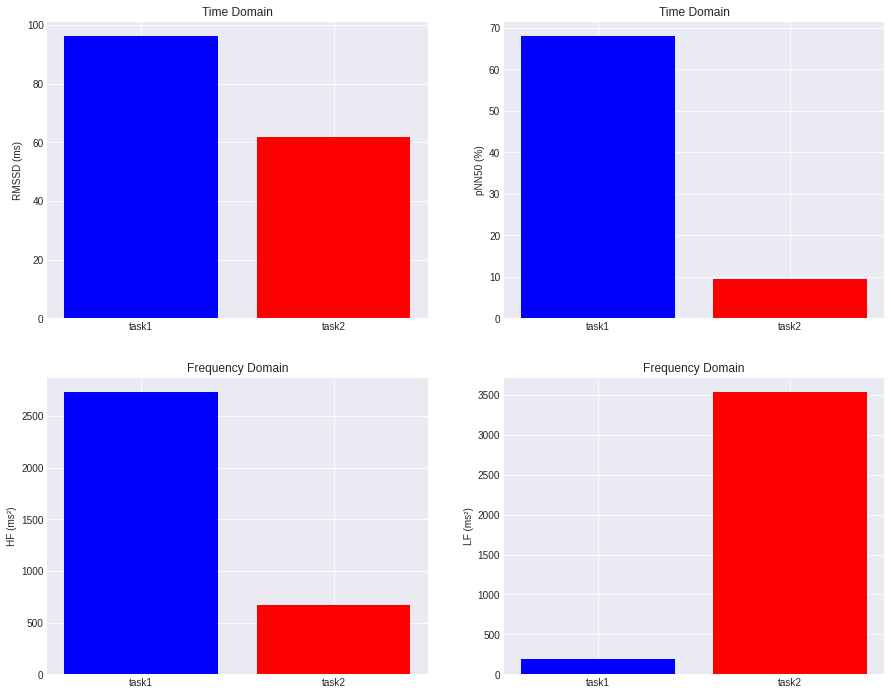

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 12)

compare_indices(
    ax[0][0],
    task1_rri_time_domain,
    task2_rri_time_domain,
    "rmssd",
    title="Time Domain",
    y_label="RMSSD (ms)"
)
compare_indices(
    ax[0][1],
    task1_rri_time_domain,
    task2_rri_time_domain,
    "pnn50",
    title="Time Domain",
    y_label="pNN50 (%)"
)

compare_indices(
    ax[1][0],
    task1_rri_freq_domain,
    task2_rri_freq_domain,
    "hf",
    title="Frequency Domain",
    y_label="HF (ms²)"
)
compare_indices(
    ax[1][1],
    task1_rri_freq_domain,
    task2_rri_freq_domain,
    "lf",
    title="Frequency Domain",
    y_label="LF (ms²)"
)

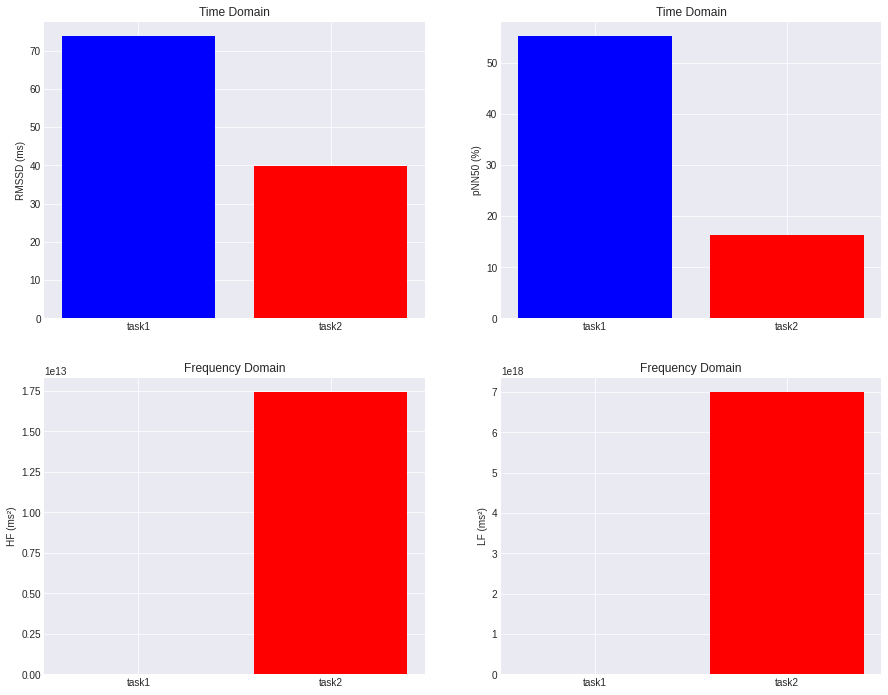

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 12)

compare_indices(
    ax[0][0],
    task3_rri_time_domain,
    task4_rri_time_domain,
    "rmssd",
    title="Time Domain",
    y_label="RMSSD (ms)"
)
compare_indices(
    ax[0][1],
    task3_rri_time_domain,
    task4_rri_time_domain,
    "pnn50",
    title="Time Domain",
    y_label="pNN50 (%)"
)

compare_indices(
    ax[1][0],
    task3_rri_freq_domain,
    task4_rri_freq_domain,
    "hf",
    title="Frequency Domain",
    y_label="HF (ms²)"
)
compare_indices(
    ax[1][1],
    task3_rri_freq_domain,
    task4_rri_freq_domain,
    "lf",
    title="Frequency Domain",
    y_label="LF (ms²)"
)